## Тема 7

### Задача A. Закраска прямой

На числовой прямой окрасили **N** отрезков. Известны координаты левого и правого концов каждого отрезка (*Li* и *Ri*). Найти длину окрашенной части числовой прямой.

**Формат ввода**  
В первой строке находится число N, в следующих N строках - пары Li и Ri. Li и Ri - целые, -10`9` ≤ Li ≤ Ri ≤ 10`9`, 1 ≤ N ≤ 15 000

**Формат вывода**  
Вывести одно число - длину окрашенной части прямой.

**Пример 1**  
**`Ввод`**	
1  
10 20  

**`Вывод`**  
10

In [ ]:
n = int(input())

line = []
for i in range(n):
  l, r = map(int, input().split())
  line.append((l,-1))
  line.append((r,1))

line.sort()

online = 0
distance = 0
dl = 0
dr = 0

for i in range(len(line)):
  if line[i][1] == -1 and online == 0:
    dl = line[i][0]
    online += 1
  elif line[i][1] == -1:
    online += 1
  elif line[i][1] == 1:
    online -= 1
    if online == 0:
      dr = line[i][0] 
      distance += dr - dl
  
print()
print(distance)


5
10 20
10 10
20 40
30 50
100 110

50


---

###  Задача B. Таможня

Идёт 2163 год. Мишу, который работает в отделении таможни при космодроме города Нью-Питер, вызвал в кабинет шеф.

Как оказалось, недавно Министерство Налогов и Сборов выделило отделению определённую сумму денег на установку новых аппаратов для автоматического досмотра грузов. Естественно, средства были выделены с таким расчётом, чтобы грузы теперь находились на таможне ровно столько времени, сколько требуется непосредственно на их досмотр.

В руках шефа каким-то образом оказались сведения о надвигающейся ревизии – список из N грузов, которые будут контролироваться Министерством. Для каждого груза известны время его прибытия, отсчитываемое с некоторого момента, хранимого в большом секрете, и время, требуемое аппарату для обработки этого груза. Шеф дал Мише задание по этим данным определить, какое минимальное количество аппаратов необходимо заказать на заводе, чтобы все грузы Министерства начинали досматриваться сразу после прибытия. Необходимо учесть, что конструкция тех аппаратов, которые было решено установить, не позволяет обрабатывать два груза одновременно на одном аппарате. Напишите программу, которая поможет Мише справиться с его задачей.

**Формат ввода**  
На первой строке входного файла задано число N (0 ≤ N ≤ 50 000).  
На следующих N строках находится по 2 целых положительных числа *Ti* и *Li* – время прибытия соответствующего груза и время, требуемое для его обработки (1 ≤ Ti ≤ 10`6`, 1 ≤ Li ≤ 10`6`).

**Формат вывода**  
В выходной файл выведите одно число – наименьшее количество аппаратов, которое нужно установить, чтобы не вызвать подозрений у Министерства.

**Пример 1**  
**`Ввод`**	
3  
3 2  
4 2  
5 2  
**`Вывод`**  
2  

In [ ]:
n = int(input())
nums = []

for _ in range(n):
  t, l = map(int, input().split())
  nums.append((t, 1))
  nums.append((t + l, -1))

nums.sort()

maxcnt = 0
onlicnt = 0
for i in range(len(nums)):
  if nums[i][1] == 1:
    onlicnt += 1
  elif nums[i][1] == -1:
    onlicnt -= 1
  if maxcnt < onlicnt:
    maxcnt = onlicnt

print()
print(maxcnt)


3
3 2
4 2
5 2

2


---

###  Задача C. Минимальное покрытие

На прямой задано некоторое множество отрезков с целочисленными координатами концов [L*i*, Ri].  
Выберите среди данного множества подмножество отрезков, целиком покрывающее отрезок [0, M], (M — натуральное число), содержащее наименьшее число отрезков.

**Формат ввода**  
В первой строке указана константа M (1 ≤ M ≤ 5000).  
В каждой последующей строке записана пара чисел Li и Ri (Li, Ri ≤ 50000), задающая координаты левого и правого концов отрезков.  
Список завершается парой нулей.  
Общее число отрезков не превышает 100 000.

**Формат вывода**  
В первой строке выходного файла выведите минимальное число отрезков, необходимое для покрытия отрезка [0; M].  
Далее выведите список покрывающего подмножества, упорядоченный по возрастанию координат левых концов отрезков.  
Список отрезков выводится в том же формате, что и во входe.  
Завершающие два нуля выводить не нужно.  
Если покрытие отрезка [0, M] исходным множеством отрезков [Li, Ri] невозможно, то следует вывести единственную фразу “No solution”.

**Пример 1**  
**`Ввод`**	
1  
-1 0  
-5 -3  
2 5  
0 0  

**`Вывод`**  
No solution


**Пример 2**  
**`Ввод`**	
1  
-1 0  
0 1  
0 0  

**`Вывод`**  
1  
0 1  

In [ ]:
m = int(input())

events = []

LINE_START = -1
LINE_END = 1
BREAKPOINT = 0

should_continue = True
lines = []
i = 0

while should_continue:
    ll, rr = map(int, input().split())
    if ll == rr == 0:
        should_continue = False
    else:
        events.append((ll, LINE_START, i))
        events.append((rr, LINE_END, i))
        lines.append((ll, rr))
        i += 1

events.append((0, BREAKPOINT, -1))
events.append((m, BREAKPOINT, -1))
events.sort()

def add_appropriate():
    global next_coord, selected_lines

    if not current_lines:
        selected_lines = set()
        return False

    sorted_current = sorted(current_lines, key=lambda x: x[1], reverse=True)
    appropriate_one = sorted_current[0]
    selected_lines.add(appropriate_one)
    next_coord = appropriate_one[1]

    if next_coord >= m:
        return False

    return True


for event in events:
    coord, event_type, line_index = event
    line = lines[line_index]

    if event_type == LINE_START:
        current_lines.add(line)

    elif event_type == LINE_END:
        if line in current_lines:
            current_lines.remove(line)
        if coord == next_coord:
            if not add_appropriate():
                break

    else:
        if coord == 0:
            if not add_appropriate():
                break
        else:
            if not current_lines:
                selected_lines = set()
            break

if not selected_lines:
    print("No solution")
else:
    print(len(selected_lines))
    print('\n'.join([f"{ll} {rr}" for ll, rr in sorted(list(selected_lines))]))
    

1
-1 0
-5 -3
2 5
0 0
No solution


---

###  Задача D. Наполненность котятами

На прямой в точках 
a1
,
a2
,
…
,
an
 (возможно, совпадающих) сидят 
n
 котят.  
На той же прямой лежат 
m
 отрезков 
[
l1
,
r1
]
,
[
l2
,
r2
]
,
…
,
[
lm
,
rm
]
.  
Нужно для каждого отрезка узнать его наполненность котятами — сколько котят сидит на отрезке.

**Формат ввода**  
На первой строке 
**n**
 и 
**m**
 (
1
≤
n
,
m
≤
1
0
`5`
).  
На второй строке 
n
 целых чисел 
**ai** 
 (
0
≤
ai
≤
1
0
`9`
).  
Следующие 
m
 строк содержат пары целых чисел 
**li**
,
**ri**
 (
0
≤
li
≤
ri
≤
1
0
`9`
).

**Формат вывода**  
Выведите 
m
 целых чисел. 
i
-е число — наполненность котятами 
i
-го отрезка.

In [ ]:
n, m = map(int, input().split())
kittens = [int(num) for num in input().split()]

# (coord, type, line_index)
events = [(0, 0, 0)] * (2 * m + n)

# (l, r, kitty_count)
lines = [[0, 0, 0]] * m

i = 0


for kitty in kittens:
    events[i] = (kitty, 0, -1)
    i += 1

for j in range(m):
    l, r = map(int, input().split())
    lines[j] = [l, r, 0]
    events[i] = (l, -1, j)
    events[i + 1] = (r, 1, j)
    i += 2

events.sort()
kittens_count = 0

for event in events:
    if event[1] == -1:
        lines[event[2]][2] = kittens_count
    elif event[1] == 1:
        lines[event[2]][2] = kittens_count - lines[event[2]][2]
    else:
        kittens_count += 1

print(' '.join([str(elem[2]) for elem in lines]))

---

###  Задача E. Полярные прямоугольники

Вася недавно изучил полярную систему координат. А именно, он изучил понятие полярного прямоугольника. Пусть задана стандартная декартова плоскость. Если на ней нарисовать две окружности с центром в начале координат, то область, находящаяся между ними, называется кольцом (на рисунке обозначена синим). Если на ней нарисовать два луча, то область, заметаемая первым лучом при движении ко второму, называется углом (т.е. область между этими двумя лучами, на рисунке обозначена зеленым). Полярным прямоугольником называется пересечение некоторого угла с некоторым кольцом (на рисунке обозначено красным).



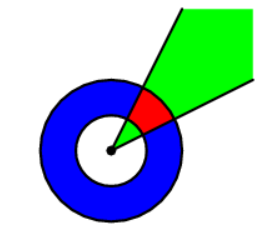

Задано несколько полярных прямоугольников. Найдите площадь их пересечения. Помните, что пересечение полярных прямоугольников может состоять из нескольких частей!

**Формат ввода**  
В первой строке вводится целое число N — количество прямоугольников (1 ≤ N ≤ 100 000).  
Далее в N строках содержится описание прямоугольников. Каждый прямоугольник описывается четверкой действительных чисел r1, r2, φ1, φ2, где r1, r2 обозначают радиусы окружностей, образующих кольцо (r1 < r2), а φ1, φ2 обозначают углы, образованные первым и вторым лучами с осью абсцисс, заданные в радианах. При этом заметается область от первого луча до второго в направлении против часовой стрелки (т.е. возрастания углов), даже в случае, когда φ1 > φ2.  
Все числа заданы максимум с шестью знаками после десятичной точки.  
Углы лежат в полуинтервале [0, 2π), а радиусы не превосходят 10`6`.  Гарантируется, что φ1 ≠ φ2.

**Формат вывода**  
Выведите единственное число — площадь искомого пересечения. Ответ будет считаться правильным, если его абсолютная или относительная погрешность не будет превышать 10`-6`.

**Пример 1**  
**`Ввод`**	
2  
1  3  0  3  
2  4  1.5  4.5  

**`Вывод`**  
3.7500000000